# Data Science Homework 4
Jason Barbarosh

## The Details
This assignment investigates the effect of unemployment on rental prices. There are two datasets:

1) Zillow-Rents.txt: 
This file is taken from Zillow’s research website and is a sum- mary file featuring Zillow’s median rent value by zip code in the United States.

2)  IRS-Tax Filing.txt: 
This file is provided by the IRS. It features data on indi- vidual income tax statistics by zip code. The data include information on the number of returns filed, number of single returns filed, total taxable income, total student loan interest deductions, and total unemployment compensation in each zip code (in thousands).

# #1 Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import matplotlib.pyplot as plt


%matplotlib inline

/Users/Jason/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# #2 Merge Datasets
To investigate the topic, you’ll need to merge the two datasets on zip code (be sure to drop any observations with missing data). 

### Import the datasets

In [2]:
zillow = pd.read_csv("Zillow-Rents.csv", header = 0, encoding='utf-8')
zillow.head()

,Zip,State,County,City,ZrentValue
0,10025,NY,New York,New York,3522
1,60657,IL,Cook,Chicago,1885
2,10023,NY,New York,New York,3783
3,60614,IL,Cook,Chicago,2125
4,79936,TX,El Paso,El Paso,992


In [3]:
zillow.describe()

,Zip,ZrentValue
count,15930.000000,15930.000000
mean,47602.492216,1512.651099
std,28938.721498,781.903736
min,1001.000000,515.000000
25%,22824.750000,1057.000000
50%,45339.000000,1303.500000
75%,74036.750000,1728.000000
max,99705.000000,16697.000000


In [4]:
irs = pd.read_csv("IRS-Tax Filing.csv", header = 0)
irs.head()

,Zip,NoReturns,SingleReturns,UnempComp,StudentLoanDeductions,TaxableIncome
0,0,259540,75820,27490,29802,10205184
1,35004,920,280,103,157,36673
2,35005,460,140,45,66,17559
3,35006,190,40,55,0,7668
4,35007,1870,530,174,287,73191


In [5]:
irs.describe()

,Zip,NoReturns,SingleReturns,UnempComp,StudentLoanDeductions,TaxableIncome
count,27787.000000,2.778700e+04,27787.000000,27787.000000,27787.000000,2.778700e+04
mean,48862.683377,1.406809e+03,540.581567,379.392342,207.010760,5.621844e+04
std,27142.470204,2.403487e+04,9631.500890,7627.099472,3409.055737,9.552925e+05
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,27021.500000,9.000000e+01,30.000000,0.000000,0.000000,3.346000e+03
50%,48876.000000,2.700000e+02,80.000000,100.000000,37.000000,1.049700e+04
75%,70585.000000,9.900000e+02,350.000000,232.000000,130.000000,3.935300e+04
max,99999.000000,2.207030e+06,919390.000000,882844.000000,262982.000000,8.518741e+07


In [6]:
df = zillow.merge(irs)
df.head()

,Zip,State,County,City,ZrentValue,NoReturns,SingleReturns,UnempComp,StudentLoanDeductions,TaxableIncome
0,10025,NY,New York,New York,3522,6250,4460,1276,1415,280416
1,60657,IL,Cook,Chicago,1885,8490,7530,1002,3930,408987
2,10023,NY,New York,New York,3783,3860,3130,1023,752,173242
3,60614,IL,Cook,Chicago,2125,6930,6290,752,2903,335742
4,79936,TX,El Paso,El Paso,992,6280,1670,1428,927,235785


### Ensure Merge Worked Correctly

In [7]:
test = zillow.iloc[0]
index = irs.Zip[irs.Zip == test.Zip].index
testEQ = irs.iloc[index]

test.Zip == testEQ.Zip

15988    True
Name: Zip, dtype: bool

In [8]:
print (test)
print ("\n", testEQ)

Zip              10025
State               NY
County        New York
City          New York
ZrentValue        3522
Name: 0, dtype: object

          Zip  NoReturns  SingleReturns  UnempComp  StudentLoanDeductions  \
15988  10025       6250           4460       1276                   1415   

       TaxableIncome  
15988         280416  


# #3 Linear Regression
Specify a simple linear regression model, where the outcome variable is Zillow’s median rent value and the covariates include an intercept, number of returns filed, number of single returns filed, total taxable income, total student loan interest deductions, and total unemployment compensation. The effect of unemployment compensation on rental prices will give insights into our topic of interest (while controlling for income and other characteristics).
(Note: The data feature large numbers. It is recommended that you transform the variables by log(variablei + 1). The “+1” is to deal with values that are 0.) Recall, the simple linear regression model (in matrix notation), y = Xβ + ε, can be estimated using ordinary least squares (OLS).

In [9]:
df.head()

,Zip,State,County,City,ZrentValue,NoReturns,SingleReturns,UnempComp,StudentLoanDeductions,TaxableIncome
0,10025,NY,New York,New York,3522,6250,4460,1276,1415,280416
1,60657,IL,Cook,Chicago,1885,8490,7530,1002,3930,408987
2,10023,NY,New York,New York,3783,3860,3130,1023,752,173242
3,60614,IL,Cook,Chicago,2125,6930,6290,752,2903,335742
4,79936,TX,El Paso,El Paso,992,6280,1670,1428,927,235785


In [10]:
def logData(x):
    return np.log(x + 1)

featuresList = ["ZrentValue", "NoReturns", "SingleReturns", "TaxableIncome", 
                  "StudentLoanDeductions", "UnempComp"]

for feature in featuresList:
    df[feature] = list(map(lambda x: logData(x), df[feature]))

In [11]:
df.head()

,Zip,State,County,City,ZrentValue,NoReturns,SingleReturns,UnempComp,StudentLoanDeductions,TaxableIncome
0,10025,NY,New York,New York,8.167068,8.740497,8.403128,7.152269,7.255591,12.544033
1,60657,IL,Cook,Chicago,7.542213,9.046762,8.926783,6.910751,8.276649,12.921441
2,10023,NY,New York,New York,8.238537,8.258681,8.049108,6.931472,6.624065,12.062451
3,60614,IL,Cook,Chicago,7.661998,8.843759,8.746875,6.624065,7.973844,12.724101
4,79936,TX,El Paso,El Paso,6.900731,8.745284,7.421178,7.264730,6.833032,12.370680


,NoReturns,SingleReturns,TaxableIncome,StudentLoanDeductions,UnempComp
NoReturns,1.000000,0.946837,0.996304,0.855395,0.714005
SingleReturns,0.946837,1.000000,0.949512,0.840162,0.667856
TaxableIncome,0.996304,0.949512,1.000000,0.855870,0.708352
StudentLoanDeductions,0.855395,0.840162,0.855870,1.000000,0.638137
UnempComp,0.714005,0.667856,0.708352,0.638137,1.000000


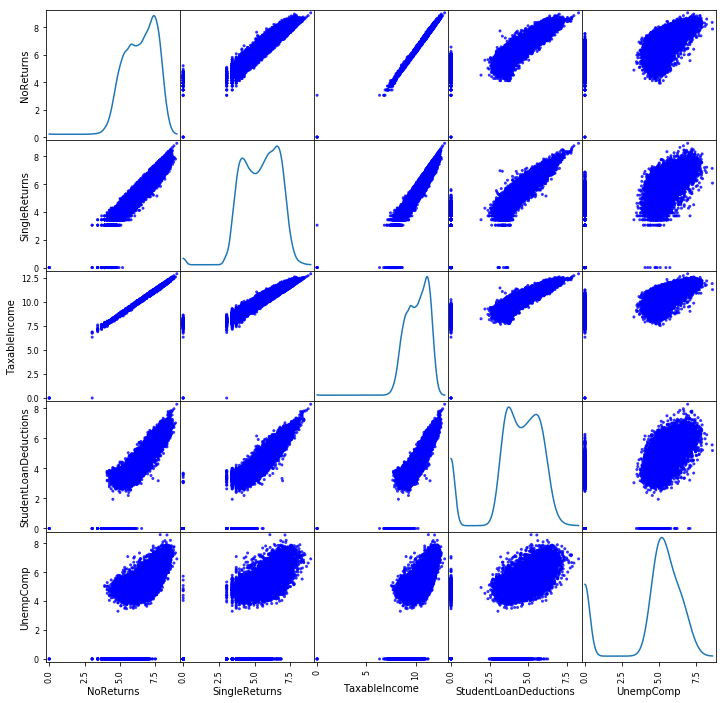

In [12]:
smaller_frame=df[["NoReturns", "SingleReturns", "TaxableIncome", 
                  "StudentLoanDeductions", "UnempComp"]]

axeslist=scatter_matrix(smaller_frame, alpha=0.8, c="b", figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

smaller_frame.corr()

In [13]:
target = pd.DataFrame (  df["ZrentValue"] )   # target variable 

features = df[["NoReturns", "SingleReturns", "TaxableIncome", 
                  "StudentLoanDeductions", "UnempComp"]]

featuresList = ["NoReturns", "SingleReturns", "TaxableIncome", 
                  "StudentLoanDeductions", "UnempComp"]

df_nonNormalized =smaller_frame[["NoReturns", "SingleReturns", "TaxableIncome", 
                  "StudentLoanDeductions", "UnempComp"]].values
df_normalized=(df_nonNormalized - df_nonNormalized.mean(axis=0))/df_nonNormalized.std(axis=0)

std = {}
std_vec = {}

for feature in featuresList:
    index = 0
    std_vec[feature]=df_normalized[:,index]
    std[feature]=std_vec[feature].reshape(-1,1)
    index += 1

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size = .10)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

est = sm.OLS(y_train, X_train).fit()
print (est.summary())

                            OLS Regression Results                            
Dep. Variable:             ZrentValue   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     1114.
Date:                Tue, 31 Oct 2017   Prob (F-statistic):               0.00
Time:                        23:52:18   Log-Likelihood:                -4495.8
No. Observations:               14224   AIC:                             9004.
Df Residuals:                   14218   BIC:                             9049.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.85

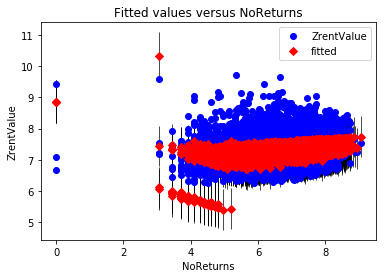

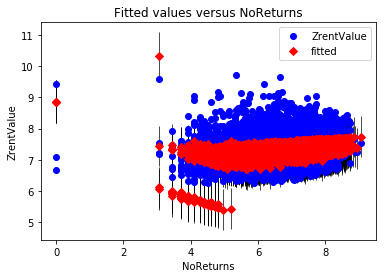

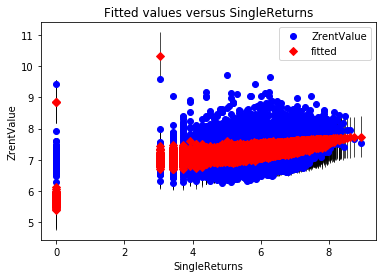

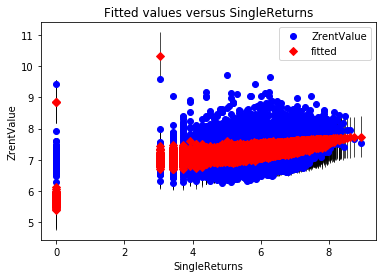

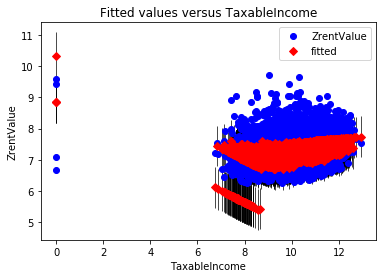

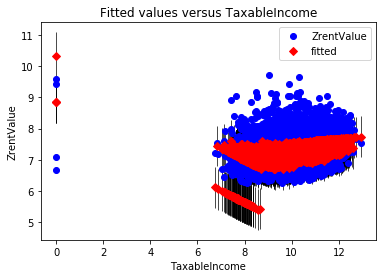

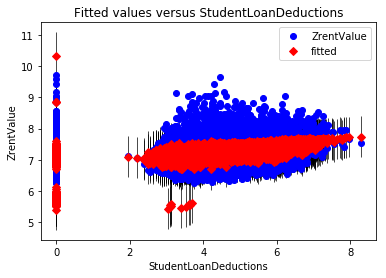

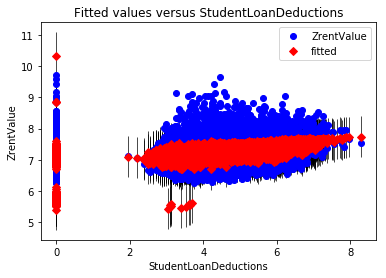

In [15]:
for i in range(1,5):
    sm.graphics.plot_fit(est, i)
    sm.graphics.plot_fit(est, i)    

In [16]:
yhat = est.predict(X_test)
print (yhat.head())

4581     7.412447
12475    7.029746
3631     7.304399
8903     7.367353
13410    7.085429
dtype: float64


In [17]:
from sklearn.metrics import mean_squared_error , r2_score

print ("Mean Squared Error: %.2f" % mean_squared_error (y_test, yhat)) 

print ("Variance score: %.2f" % r2_score(y_test, yhat)) # closer to 1, the better 


Mean Squared Error: 0.11
Variance score: 0.29


# Discussing the Model

### The Procedure

This regression model uses ordinary least squares (OLS) as for prediction. This is an algorithm that minimizes the sum of squared differences (ie. the variance) between the observed and predicted values.

In this exercise, we attempted to find determinants of median rent value using Zillow. After importing and merging the datasets, I applied a natural log + 1 to all the numbers. This is useful because it alleviates the burdon of dealing with 0 values. From there, I ran a log-log specification regression and got the results above.

### The findings

In [18]:
print ("The r^2 in this multivariable regression is %s. This implies that \
%s%% of the variation in ZrentValue is explained by my model. SingleReturns and TaxableIncome were \
very highly significant, while UnempComp was also moderately significant. Before we look at the \
data, we need to remember that this is a log-log specification. This implies that \
if we increase number of single returns filed by 10%%, then we expect to see \
a %s%% increase in ZrentValue. On the other hand, if we increase TaxableIncome by \
1%%, then we see a %s%% change in ZrentValue." 
       % ( round(est.rsquared, 3), round(est.rsquared, 3)*100, round(est.params[2]*10, 3), round(est.params[3], 3) ))

The r^2 in this multivariable regression is 0.281. This implies that 28.1% of the variation in ZrentValue is explained by my model. SingleReturns and TaxableIncome were very highly significant, while UnempComp was also moderately significant. Before we look at the data, we need to remember that this is a log-log specification. This implies that if we increase number of single returns filed by 10%, then we expect to see a 4.436% increase in ZrentValue. On the other hand, if we increase TaxableIncome by 1%, then we see a -0.422% change in ZrentValue.


Please submit the following:
• All code and final data
• A brief discussion of the model and estimation procedure • Tables of regression results
• An analysis and discussion of the findings.
Be sure to zip-up the files before submitting online.